End to End - Machine Learning 

##### Framing the problem 

The given dataset is a list of population, median income, median housing
price in the state of california 

Business Goal: Depending on the median housee price and other signals, is it worth investing in a given area.

Currend Model: Understand the current solution and try to get the performance on the current model. 

Data Pipeline: Sequence of data processing components is called a data pipeline

    side note: univariate regression problem is when a single response is predicted for a many predictors*
    similarly multivariate regrssion problem is when multiple response variables are predicted for many predictors*


##### Selecting a performance measure 

In this case of linear regression - Root mean squared

$$ RMSE(X,h) = \sqrt{\frac{1}{n} \sum_{i=1}^\infty (y_{i}-\hat{h}(x_{i}))^2} $$

$$ x \text{ is the vector of the feature values} $$
$$ y \text{ is the desired output value of that instance} $$
$$ m \text{ is the total number of observations} $$
$$ X \text{ is a matrix contains all the feature values in each column } x^{T} $$
$$ h \text{ is a prediction function which gives } \hat{y} $$
$$ RMSE(X,h) \text{ is the cost function measured on the set of examples using your hypothesis h } $$

RMSE is generally preferred but in some contexts we may need to use a different measure 
eg: Mean Absolute Error 

$$ MAE(X,h) = \frac{1}{n} \sum_{i=1}^{m} |{y_{i}- h(x_{i})}| $$

    Computing the squared root corresponds to Euclidean norm. also called l2 norm
    Computing the sum of absolutes corresponds to l1 norm
    
Higher the norm index the more focus is given to the large values and smaller ones are ignored.

##### Check the Assumptions

In the case of the real estate pricing example the downstream might convert the prices and class them as Cheap, medium and expensive. Hence in this case we need to get the category right rather than the price itself. Instead of regression this becomes a classification problem. 



#### Getting the Data 

In [110]:
# import statements and setting the download folder
import os
import tarfile
import urllib

URL_LINK = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.chdir("E:\\Datasets") # changing dir
PATH = os.path.join("housing") #name of the folder
DOWNLOAD_FILE = URL_LINK + "datasets/housing/housing.tgz"

In [111]:
# creating a generic fucntion to download the file 

def get_housing_data(download_file=DOWNLOAD_FILE, path=PATH):
    '''Pass the file to download and path where to store the file'''
    if not os.path.isdir(path):
        os.makedirs(path)
    if "tgz" in download_file: # Checking if we need to extract the file
        tgz_path = os.path.join(path,"housing.tgz")
        urllib.request.urlretrieve(download_file,tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=path)
        housing_tgz.close()
    else: 
        print("check the file in the system")

In [74]:
get_housing_data(DOWNLOAD_FILE,PATH) # download the dataset

In [116]:
#importing pandas 
import pandas as pd
def load_dataset(path=PATH):
    if os.path.isfile(os.path.join(path,'housing.csv')):
        csv_path = os.path.join(path,'housing.csv')
        return pd.read_csv(csv_path)
    else: 
        return "file not found"


In [117]:
data = load_dataset(PATH) #loading the data to pandas

In [120]:
data.head() #getting first 5 rows of data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [121]:
data.info() #info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [122]:
data['ocean_proximity'].value_counts() #getting count of unique values of ocean_proximity 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [123]:
data.describe() # getting stats about the data set 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### Visualizing the data via histrogram 

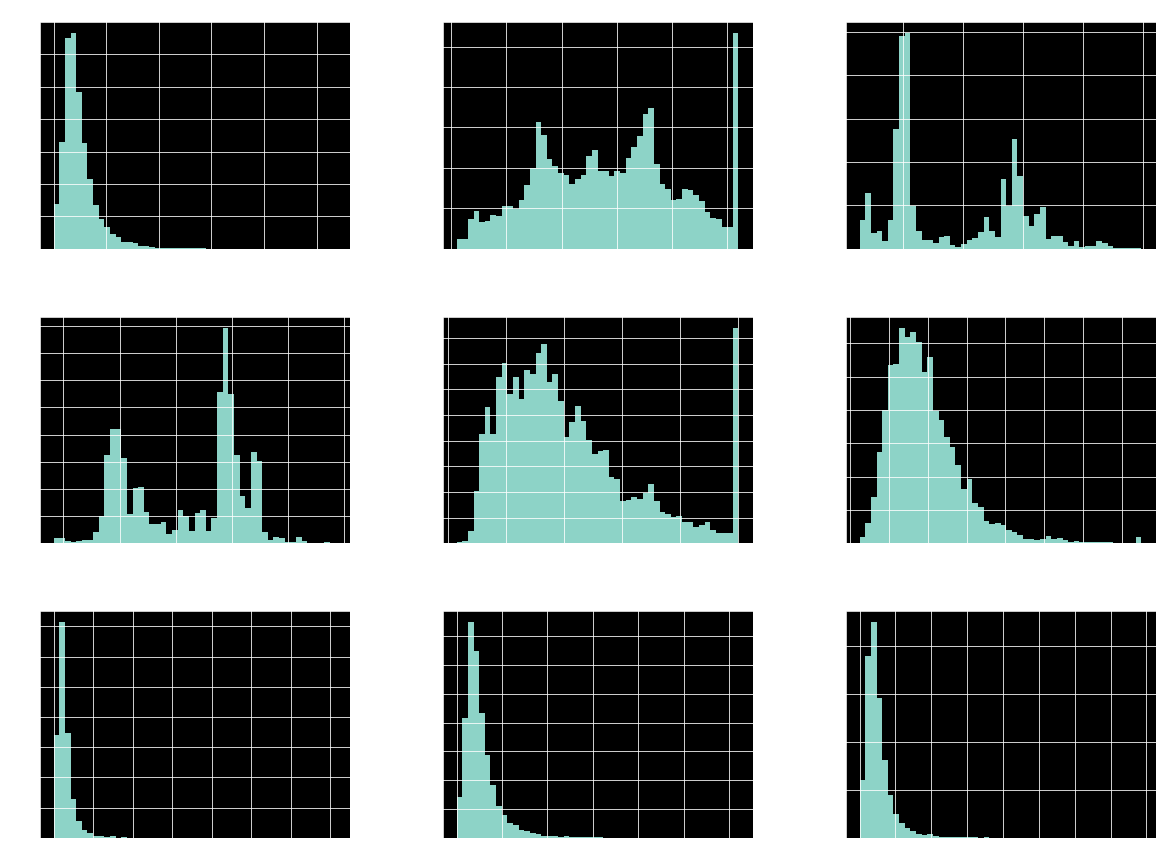

In [241]:
%matplotlib inline 
#magic function to plot and store the figure in the notebook 
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
data.hist(bins = 50,figsize=(20,15))
plt.show()


##### Observations

    1. The median_income is not expressed in dollars and the data is capped
    2. Similarly the median_age and also the median_house_value is capped at 
        a.since Median_house_value is our target variable we need to find out why this is capped? 
If we need to model including the median_house_value beyond 500k.
    
    collect the proper labels for which the values were capped
    remove the district from training set and test set for which the house values beyond 500,000 were capped

--

    3.These attributes are of different scale, we need to perform feature scaling to bring them in the same scale
    4.Since the histograms are tail heavy we need to bring them to a normal distribution in order for the model to detect the patterns. 

###### Data Snooping Bias 

When we split the training set to test set, we shouldn't look at the test set data as we might detect certain pattern and might be biased to that. 

###### Sampling Bias

When the sample size is not too large, we should be aware of the sampling bias. The sample chosen should representive of the population. 

###### Stratified sampling

The training data is divided into subgroups and right numbers are sampled across the 2 groups. 
the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population.

In [178]:
# scikit learn has a train_test_split function which split the training set and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data,test_size=0.2,random_state = 42)

##### Pandas cut function 
Used in order to convert continuous variable into groups or ranges 
Bin values into discrete intervals
##### Numpy infy function
Numpy.inf gives the positive infinity.


In [173]:
# converting the continuous variable to a categorical variable
# We use this information to get the stratified sampling. 
data['income_cat'] = pd.cut(data['median_income'],
                     bins = [0.,1.5,3.0,4.5,6.,np.inf],
                     labels = [1,2,3,4,5])

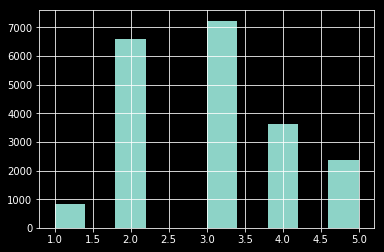

In [176]:
data['income_cat'].hist()
plt.show()

In [181]:
from sklearn.model_selection import StratifiedShuffleSplit
strasplit = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in strasplit.split(data,data['income_cat']):
    strain_set = data.iloc[train_index]
    stest_set = data.iloc[test_index]

In [188]:
strain_set['income_cat'].value_counts() / len(strain_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [216]:
data.drop(labels='income_cat',axis=1,inplace=True) #drop the column income_cat 
# inplace=False by default will return None and not perform the operation. 
# the console will display the dataframe without the column. In order to apply the drop inplace = True

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


#### Exploratory Data Analysis

In [207]:
# Analysing the location data with longititude and Latitude 
data = strain_set.copy() #taking the copy of the training data 

In [218]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


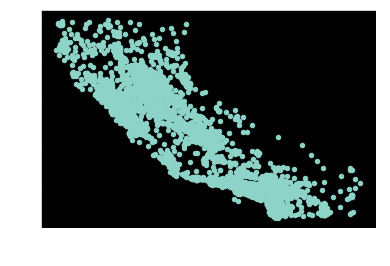

In [229]:
data.plot(kind='scatter',x='longitude',y='latitude')
plt.show()

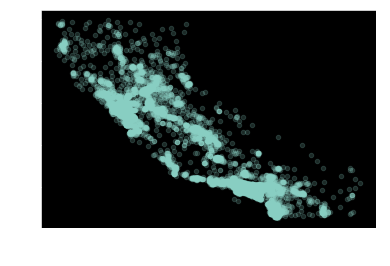

In [221]:
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2)
plt.show()

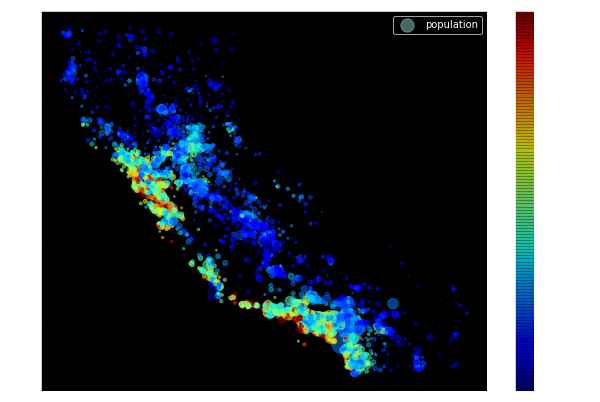

In [264]:
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,
         s=data['population']/100,label='population',figsize=(10,7),
         c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()